<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [256]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt<div class="alert alert-block alert-info"> Data Cleaning</div>
import pandas as pd


#added
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression



sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [257]:
# Load the data
house = pd.read_csv('./housing.csv')

<div class="alert alert-block alert-info"> EDA </div>

Used the following to explore data:

1) house.head() - 5 row x 81 col
2) house.shape - (1460,81)
3) house.columns 
4) house.info
5) remove null

In [259]:
# Have a preview of the the df
#house.head()

In [260]:
#To check no. of rows and columns
#house.shape

In [7]:
#To do a quick check for class and no.

#house.BldgType.value_counts()
#house.MSZoning.value_counts()
#house.MSSubClass.value_counts()

In [261]:
#To do view complete items in columns
#house.columns

In [262]:
#To view and check for null values
#house.info()

In [263]:
#Plot graph to have better visual of null item and clean up
#plt.subplots(figsize= (10,12))
#house.isnull().sum().plot.barh()

In [11]:
#house[house.MSZoning=='RM']

In [12]:
#  Assume FV, RH, RL, RP, RM as residential
# 
#MSZoning: Identifies the general zoning classification of the sale.
#		
#       A	Agriculture
#       C	Commercial (Y)
#       FV	Floating Village Residential (Y)
#       I	Industrial
#       RH	Residential High Density (Y)
#       RL	Residential Low Density (Y)
#       RP	Residential Low Density Park 
#       RM	Residential Medium Density (Y)

<div class="alert alert-block alert-info"> Question 2: Remove commercial </div>

Steps:

1) Check the column for unique items

2) Remove rows with C in MSZoning



In [265]:
for category in house.MSZoning.unique():
    print category, house[house.MSZoning == category].shape

RL (1151, 81)
RM (218, 81)
C (all) (10, 81)
FV (65, 81)
RH (16, 81)


In [15]:
res = house[~house.MSZoning.isin(['C (all)'])]
res.shape

(1450, 81)

In [16]:
for category in res.MSZoning.unique():
    print category, res[res.MSZoning == category].shape

RL (1151, 81)
RM (218, 81)
FV (65, 81)
RH (16, 81)


Continue with exploration

1) Create a copy of house data in case of data corruption during cleanup.

In [139]:
res1 = house.copy()

In [1]:
#res1.info()

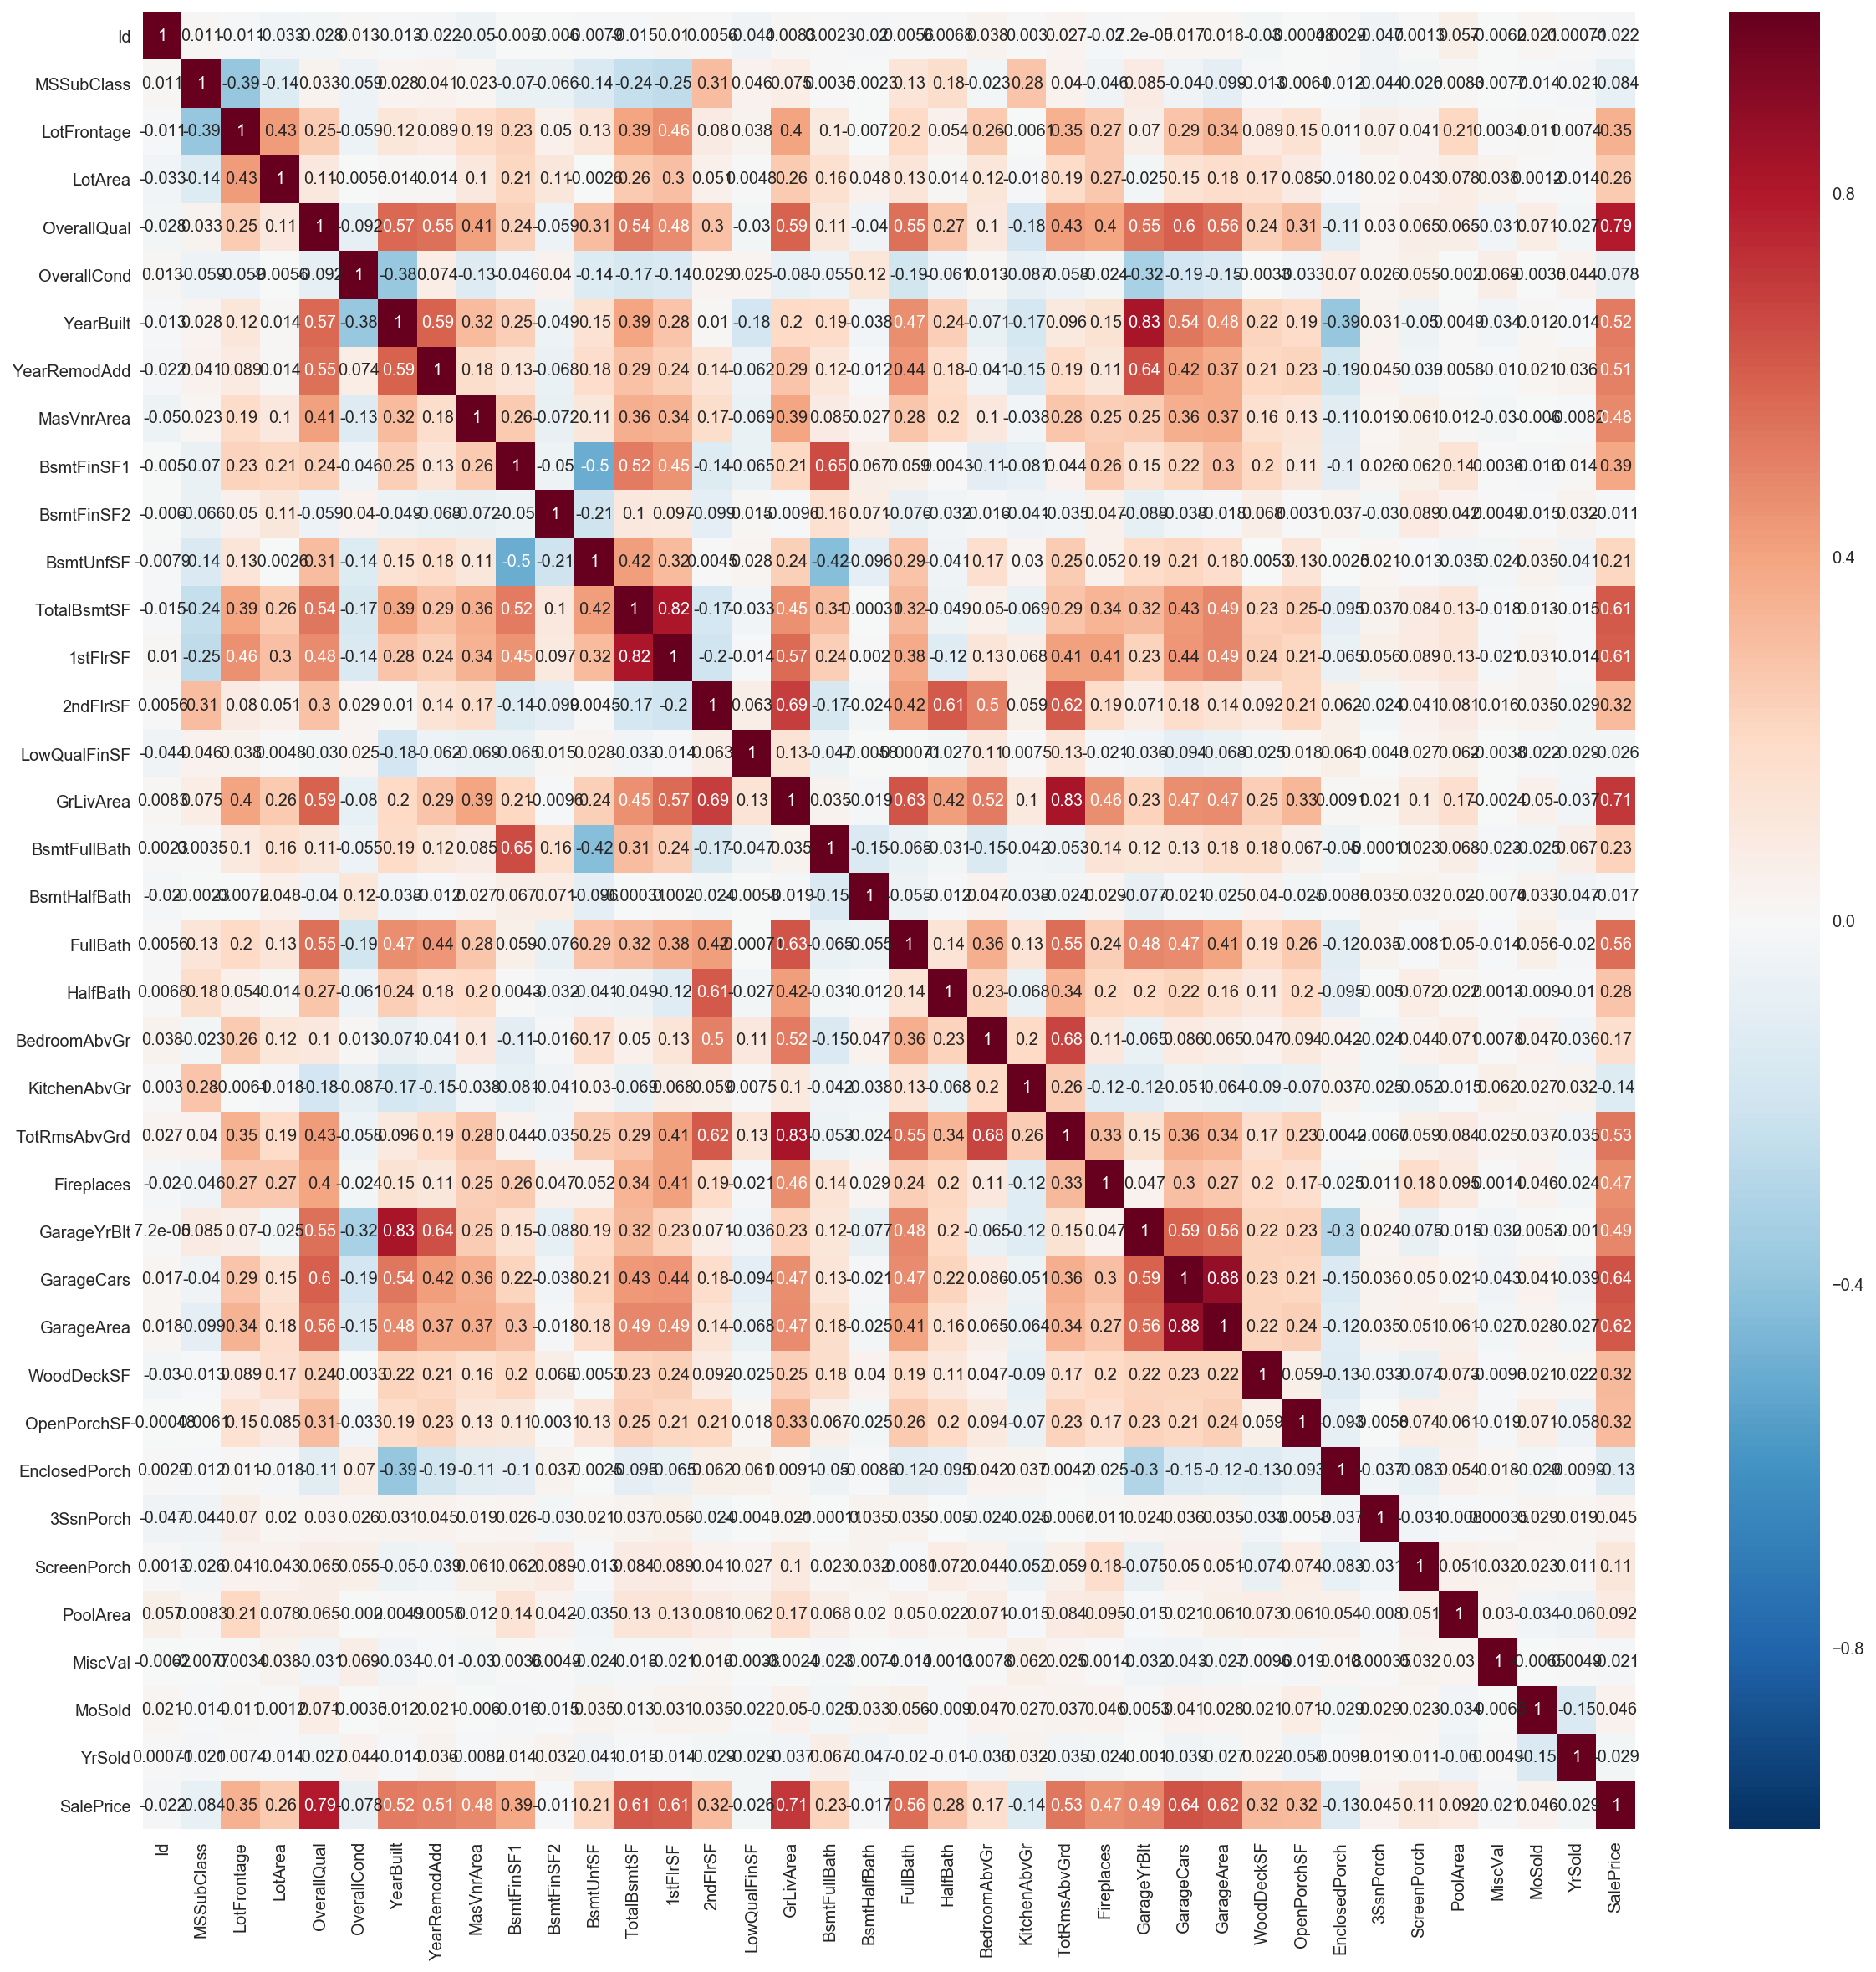

In [347]:
plt.figure(figsize=(20,20))
sns.heatmap(res1.corr(), annot = True,)
plt.show()

<div class="alert alert-block alert-info"> Data Cleaning</div>

Steps:

1) Identified columns with null and drop columns.

2) Identify cells with na fill with more meaningful data.

3) Identify renovatable items to be removed for the data frame to contain only the fixed items.


In [17]:
res.drop(['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)   # Drop multiple columns.

/Users/kelvinang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
#Assume nan as no such item

for gar in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    res[gar].fillna('No Gar',inplace=True)
    
for base in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    res[base].fillna('No Basemt',inplace = True)
    
res.GarageYrBlt.fillna(res.GarageYrBlt.mean(),inplace=True)

res.FireplaceQu.fillna('No Firepl', inplace=True)

res.LotFrontage.fillna(0., inplace=True)

res.MasVnrArea.fillna(res.MasVnrArea.min(), inplace=True)

res.MasVnrType.fillna('None', inplace=True)

res.Electrical.fillna('SBrkr', inplace=True)

/Users/kelvinang/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [56]:
#identify and remove renovatable items

renovatable = ['Utilities','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond',
                'BsmtCond','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
               'FireplaceQu','GarageFinish','GarageQual','GarageCond']



In [57]:
#to identify non renovatable items

fixed = [c for c in res.columns if c not in renovatable]
remove_reno = res[fixed]

remove_reno.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'LotShape', u'LandContour', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'Condition2', u'BldgType',
       u'HouseStyle', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'MasVnrType', u'MasVnrArea', u'Foundation',
       u'BsmtQual', u'BsmtExposure', u'BsmtFinSF1', u'BsmtFinSF2',
       u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'TotRmsAbvGrd',
       u'Functional', u'Fireplaces', u'GarageType', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'PavedDrive', u'WoodDeckSF',
       u'OpenPorchSF', u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch',
       u'PoolArea', u'MiscVal', u'MoSold', u'YrSold', u'SaleType',
       u'SaleCondition', u'SalePrice'],
      dtype='object')

In [138]:
remove_reno.shape

(1450, 57)

In [58]:
#to identify renovatable

renovate = [c for c in res.columns if c in renovatable]
reno_df = res[renovate]

reno_df.columns

Index([u'Utilities', u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd',
       u'ExterQual', u'ExterCond', u'BsmtCond', u'BsmtFinType1',
       u'BsmtFinType2', u'Heating', u'HeatingQC', u'CentralAir', u'Electrical',
       u'KitchenQual', u'FireplaceQu', u'GarageFinish', u'GarageQual',
       u'GarageCond'],
      dtype='object')

In [59]:
#add YrSold and SalePrice back

reno_df = pd.concat([reno_df, res['YrSold']], axis=1)

In [60]:
reno_df = pd.concat([reno_df, res['SalePrice']], axis=1)

In [61]:
reno_df.columns

Index([u'Utilities', u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd',
       u'ExterQual', u'ExterCond', u'BsmtCond', u'BsmtFinType1',
       u'BsmtFinType2', u'Heating', u'HeatingQC', u'CentralAir', u'Electrical',
       u'KitchenQual', u'FireplaceQu', u'GarageFinish', u'GarageQual',
       u'GarageCond', u'YrSold', u'SalePrice'],
      dtype='object')

<div class="alert alert-block alert-info"> Preparation for regression </div>

Prepare for regression:
1) Use patsy for coding the categorical items and set target as SalePrice

2) Check patsy results

3) Split train set to before 2010 and test set for 2010

In [267]:
#use patsy to get formula and require to rename column due to patsy requirement to not have numbers.
import patsy

remove_reno.rename(columns={'3SsnPorch':'SsnPorch', '1stFlrSF': 'FirstFlrSF', '2ndFlrSF': 'SecondFlr'},inplace=True)
f = 'SalePrice ~ '+' + '.join([c for c in remove_reno.columns if not c == 'SalePrice'])+' -1'
yb,Xb = patsy.dmatrices (formula_like = f, data = remove_reno,return_type='dataframe')

In [273]:
# check patsy 
#Xb.head() - 5 rows x 146 columns, previously was 57 columns.
#yb.head()

In [83]:
# splitting training and test sets
X_train = Xb[~Xb.YrSold.isin([2010])]
X_test = Xb[Xb.YrSold.isin([2010])]
y_train = yb[~Xb.YrSold.isin([2010])]
y_test = yb[Xb.YrSold.isin([2010])]


In [86]:
#fit_transform[X_train]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
Xs = scaler.transform(X_train)
Xt = scaler.transform(X_test)

In [305]:
#y_train

In [306]:
#X_train.head() 

In [315]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()

lr2.fit(Xs,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [316]:
lr2.score(Xs,y_train)

0.88712393751952978

In [317]:
lr2.score(Xt, y_test)

0.88697683339123901

In [162]:
predicted_train = lr2.predict(Xs)

In [281]:
predicted_train

array([[ 203336.56058637],
       [ 202011.73240388],
       [ 203692.50634661],
       ..., 
       [ 209202.479539  ],
       [ 168841.94539031],
       [ 148166.62766989]])

In [163]:
predicted_train.shape# Dataframe with shape (1278,1)

(1278, 1)

In [164]:
#type(predicted_train)

numpy.ndarray

In [165]:
#predicted_test = lr2.predict(Xt)

In [351]:
#type(predicted_test)#numpy array with shape (172, 1)

In [349]:
#predicted = lr2.predict(Xt)
#predicted.shape

In [350]:
#type(predicted)

In [309]:
from sklearn.model_selection import cross_val_score

reg_scores = cross_val_score(LinearRegression(), Xs, y_train, cv=5)
print "Linear Mean Score :",np.mean(reg_scores)
print "Linear Std Score :",np.std(reg_scores)
print "Linear Regression Score :",reg_scores


Linear Mean Score : -1.00043547606e+22
Linear Std Score : 1.9760667064e+22
Linear Regression Score : [  8.78685743e-01  -4.95238065e+22   8.13593394e-01   8.39013734e-01
  -4.97967270e+20]


In [290]:
X_train['y_pred'] = predicted_train

In [294]:
sale_train = remove_reno[~remove_reno.YrSold.isin([2010])]

In [296]:
X_train['Actual_Sale'] = sale_train.SalePrice

In [297]:
X_train['Residuals'] = X_train['Actual_Sale'] - X_train['y_pred']

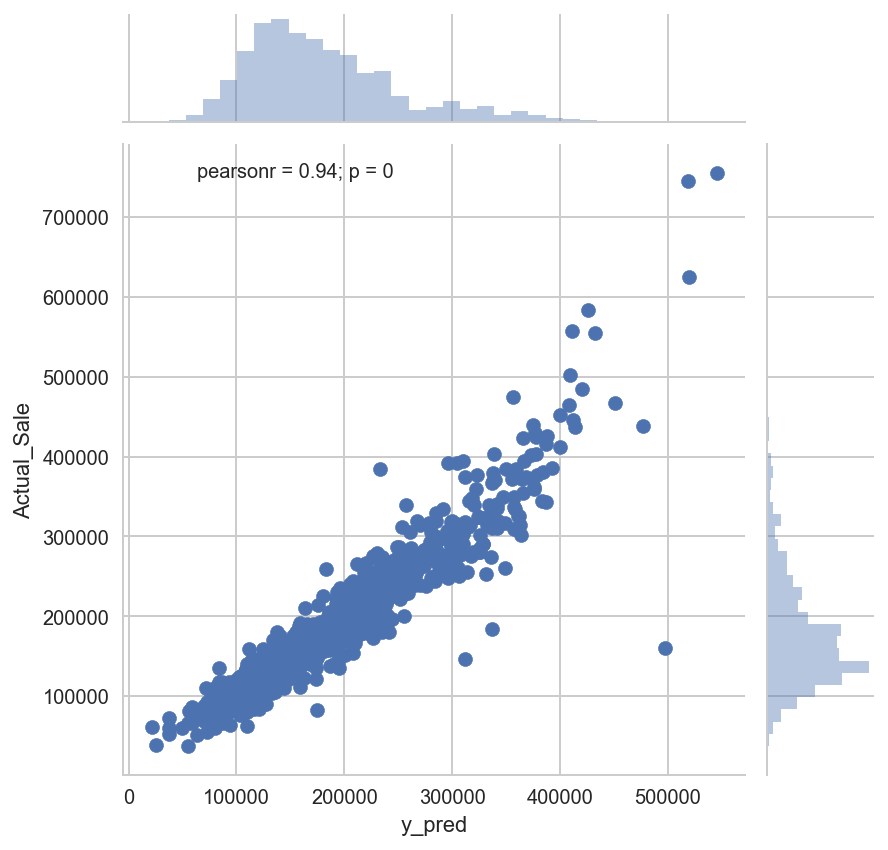

In [304]:
#plot the variable against the target to confirm the relationship visually

sns.jointplot(X_train['y_pred'],X_train['Actual_Sale'])

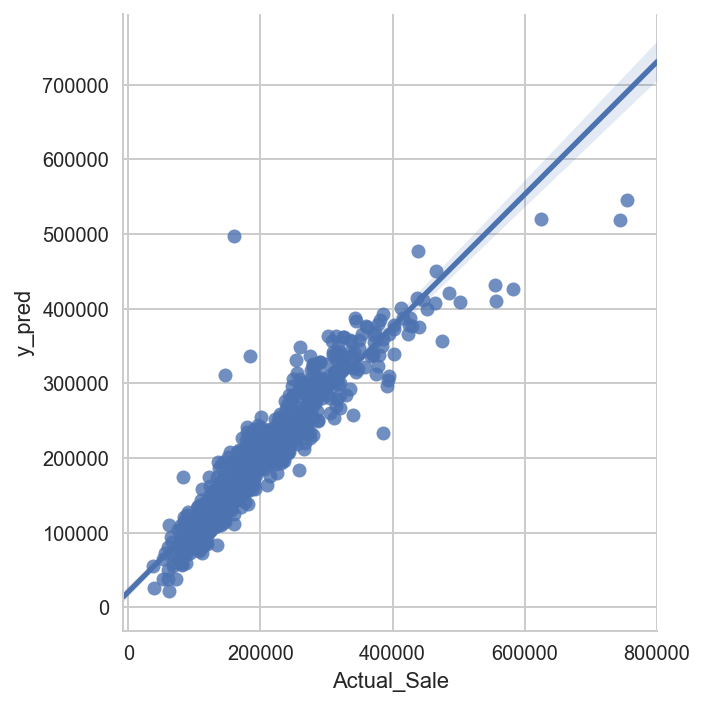

In [299]:
import seaborn as sns
%matplotlib inline

sns.lmplot(x='Actual_Sale', y='y_pred', data=X_train, )

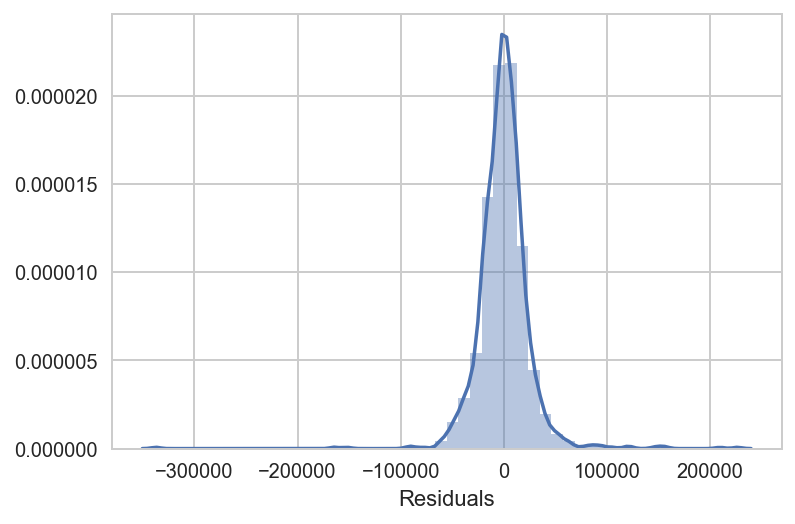

In [300]:
sns.distplot(X_train['Residuals'])

Q: Train a model on pre-2010 data and evaluate its performance on the 2010 houses. Characterize your model. 
    How well does it perform?
    
Using liner regression model to perform on the pre 2010 training set, we got a score of 0.88, which is good.

Q: What are the best estimates of price?

Best estimates are those which exhibits strong relation with the price

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

<div class="alert alert-block alert-info"> Calculate the Residual </div>

In [353]:
#reno_df.head() #dataframe with shape(1450,21)

In [173]:
diff_test = y_test - predicted_test# difference for test set

In [203]:
#diff_test.rename

In [354]:
#type(predicted_train) 

In [355]:
#type(y_test) 

In [352]:
#type(predicted_test)

In [174]:
diff_train = y_train - predicted_train# difference for train set

In [177]:
#predicted_train

In [178]:
reno_df.columns

Index([u'Utilities', u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd',
       u'ExterQual', u'ExterCond', u'BsmtCond', u'BsmtFinType1',
       u'BsmtFinType2', u'Heating', u'HeatingQC', u'CentralAir', u'Electrical',
       u'KitchenQual', u'FireplaceQu', u'GarageFinish', u'GarageQual',
       u'GarageCond', u'YrSold', u'SalePrice'],
      dtype='object')

In [196]:
df3 = res[reno_df.columns]


In [325]:
df3.shape

(1450, 21)

In [326]:
df4 = df3.drop(['YrSold'], axis=1)

In [327]:
#use patsy to get formula and require to rename column due to patsy requirement to not have numbers.
import patsy
df4.rename(columns={'Exterior1st':'Exteriorfirst', 'Exterior2nd': 'Exteriorsecond', 'BsmtFinType1': 'BsmtFinTypeOne',
                    'BsmtFinType2': 'BsmtFinTypeTwo'},inplace=True)
f = 'SalePrice ~ '+' + '.join([c for c in df4.columns if not c == 'SalePrice'])+' -1'
ybreno,Xbreno = patsy.dmatrices (formula_like = f, data = df4,return_type='dataframe')

In [332]:
#To check patsy
#Xbreno.columns

In [227]:
# splitting training and test sets
X_trainreno = Xbreno[~df3.YrSold.isin([2010])]
X_testreno = Xbreno[df3.YrSold.isin([2010])]
y_trainreno = ybreno[~df3.YrSold.isin([2010])]
y_testreno = ybreno[df3.YrSold.isin([2010])]

In [228]:
#ybreno

In [229]:
#reno_df['SalePrice']

In [321]:
from sklearn.linear_model import LinearRegression
lr3 = LinearRegression()

lr3.fit(X_trainreno,diff_train)

ypred = lr3.predict(X_testreno) #predicted value

In [330]:
ypred.shape

(172, 1)

In [335]:
X_testreno.shape

(172, 101)

In [336]:
X_testreno['y_pred'] = ypred

In [344]:
diff_test.shape

(172, 1)

In [345]:
X_testreno['Residual'] = diff_test

In [324]:
lr3.score(X_testreno, diff_test)

0.11775242760541005

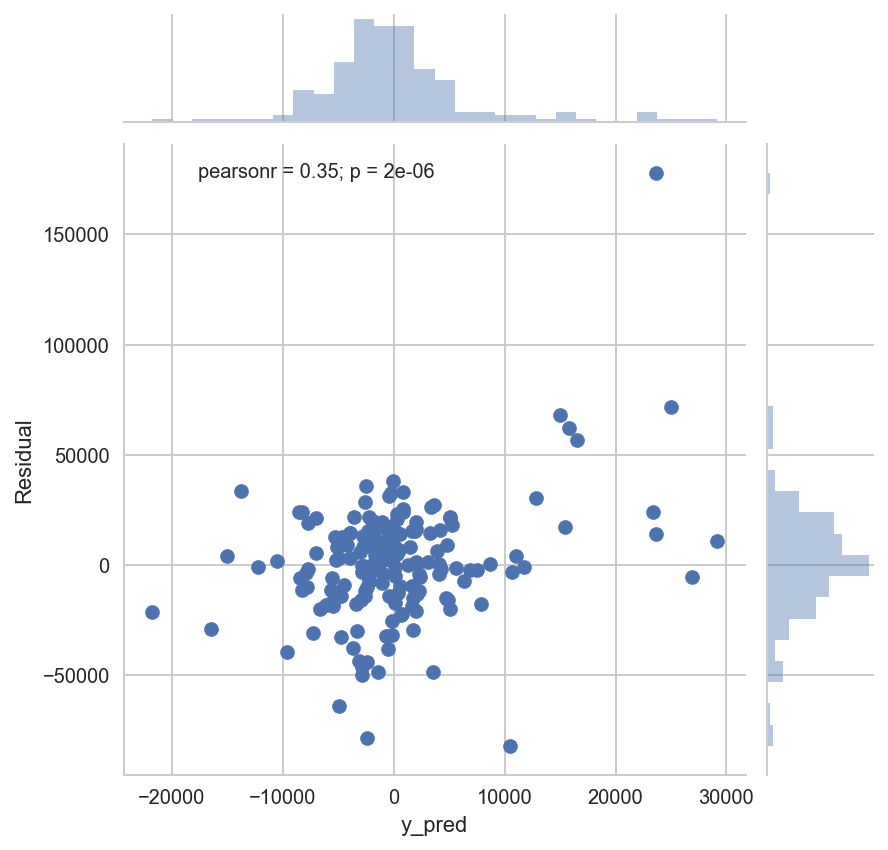

In [346]:
sns.jointplot(X_testreno['y_pred'], X_testreno['Residual'])

Question: Explain how the company can use the two models you have built to determine if they can make money.

Potential use of models are:
- to predict property prices
- to identify under valued properties for development


Question: Investigate how much of the variance in price remaining is explained by these features.
Do you trust your model? 

Due to the low score of 0.11 and below the baseline, we do not trust the model.

Should it be used to evaluate which properties to buy and fix up?

The model is unable to predict which propertiese to buy and fix up.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [255]:
# A:

#code abnormal sale as 1 and the rest as 0
#do a regression with SaleCondition as target


In [357]:
#res1.columns